In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import itertools
import scipy.stats as scs
import statsmodels.api as sm

In [2]:
from get_clean_data_DTR import get_data, clean_data, get_feats, get_target

In [29]:
def get_clean_feats(year):
    prelim_df = get_data(year)
    df = clean_data(prelim_df, year)
    feats = get_feats(df, year)
    X = feats[['eir','fndng_tgt_{}'.format(year), 'tgt_nrml_cost_{}'.format(year), 'pmts_to_part_{}'.format(year)]]
    X['eir_ft'] = X['eir']/100 * X['fndng_tgt_{}'.format(year)]
    X['eir_tnc'] = X['eir']/100 * X['tgt_nrml_cost_{}'.format(year)]
    X['eir_pmt'] = X['eir']/100 * X['pmts_to_part_{}'.format(year)]
    y = get_target(df, year)
    return X, y
def get_clean_feats_small(year, cutoff:float):
    prelim_df = get_data(year)
    prelim_df = prelim_df[prelim_df['fndng_tgt_{}'.format(year)] < prelim_df['fndng_tgt_{}'.format(year)].quantile(cutoff)]
    df = clean_data(prelim_df, year)
    feats = get_feats(df, year)
    X = feats[['eir','fndng_tgt_{}'.format(year), 'tgt_nrml_cost_{}'.format(year), 'pmts_to_part_{}'.format(year)]]
    X['eir_ft'] = X['eir']/100 * X['fndng_tgt_{}'.format(year)]
    X['eir_tnc'] = X['eir']/100 * X['tgt_nrml_cost_{}'.format(year)]
    X['eir_pmt'] = X['eir']/100 * X['pmts_to_part_{}'.format(year)]
    y = get_target(df, year)
    return X, y

In [17]:
colors = itertools.cycle(["c", "m", "y"])
def plot_results(y_true, y_pred):
    plt.figure(figsize=(20,8))
    #xx = np.linspace(0, len(y_true), num=len(y_true)
    plt.scatter(y_true,y_pred, s=20, color=next(colors), label="data")
    #plt.plot(xx, y_pred, color="cornflowerblue", label="max_depth=4", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("Funding Target")
    plt.title("Predicting Funding Target from Linear Regression trained on 2014 data")
    plt.legend()
    plt.show()
    return

def plot_resid(y_true, y_pred):
    resid = y_true - y_pred

    plt.figure(figsize=(20,8))
    xx = np.linspace(0, len(y_true), num=len(y_true))
    plt.scatter(xx, resid, s=20, c="blue", label="residuals")
    plt.xlabel("data")
    plt.ylabel("residual")
    plt.title("Residuals of Predictions vs Actuals (Linear Regerssion)")
    plt.legend()
    plt.show()
    return

<h3>Features:</h3>
    <ul><li>Prior year funding target
        <li>Prior year target normal cost (expected growth in funding target)
        <li>Prior year benefits paid
        <li>Prior year effective interest rate (single effective rate that approximates the effect of 3-tiered rates actually used to value funding target
    </ul>

<h3>Interaction Features: Interest on FT, TNC, Pmts</h3>

In [44]:
X, y = get_clean_feats(2014)

<h2>Fit a Linear Regression</h2>

In [9]:
def summary_model(X, y, label='scatter'):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    return summary

In [10]:
summary_model(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         fndng_tgt_2015   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 2.921e+05
Date:                Tue, 27 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:30:40   Log-Likelihood:            -9.0777e+05
No. Observations:               44492   AIC:                         1.816e+06
Df Residuals:                   44484   BIC:                         1.816e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -3.97e+07   3.14e+07     -1.262      0.207   -1.01e+08    2.19e+07
eir                 6.532e+06   4.86e+06      1.345      0.179   -2.99e+06    1.61e+07
fndng_tgt_2014         1.2851      0.077     16.625      0.000       1.134       1.437
tgt_nrml_cost_2014    -1.3457      1.164     -1.156      0.248      -3.628       0.936
pmts_to_part_2014     -1.8582      0.624     -2.979      0.003      -3.081      -0.636
eir_ft                -3.5166      1.192     -2.951      0.003      -5.852      -1.181
eir_tnc               49.7560     17.981      2.767      0.006      14.513      84.999
eir_pmt               16.5571      9.633      1.719      0.086      -2.324      35.438
==============================================================================
Omnibus:                   140460.630   Durbin-Watson:                   0.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      16823176715.963
Skew:                          50.783   Prob(JB):                         0.00
Kurtosis:                    3013.729   Cond. No.                     4.53e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h1>Test on 2015 Data</h1>

In [11]:
'''Fit Model to Test Predictions'''
X = sm.add_constant(X)
lin_model = sm.OLS(y, X).fit()

In [12]:
X15, y15 = get_clean_feats(2015)

In [13]:
X15 = sm.add_constant(X15)
yhat15 = lin_model.predict(X15)

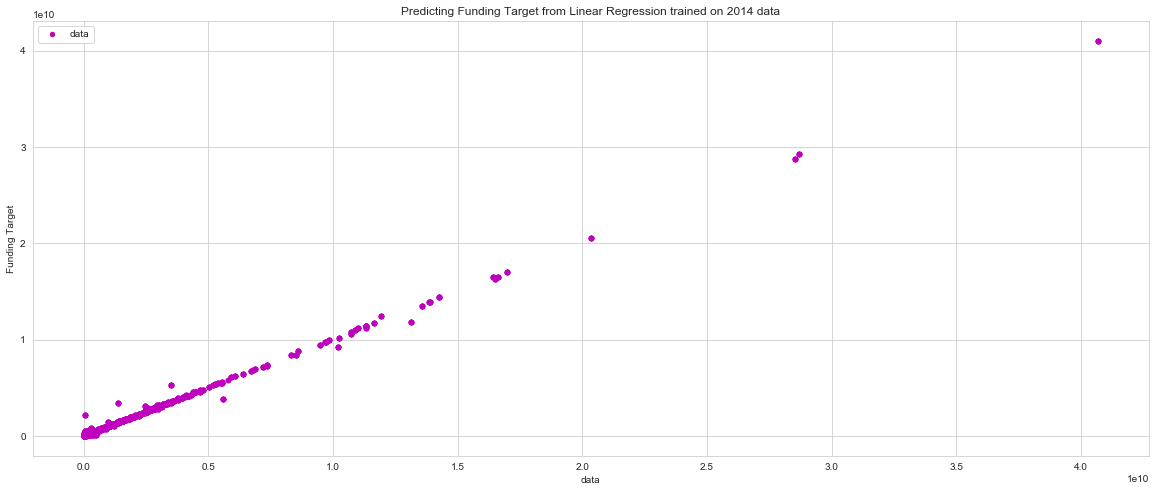

In [20]:
plot_results(y15,yhat15)

In [21]:
resid_15 = y15-yhat15

In [22]:
resid_15

0       -1.276001e+07
1       -2.412357e+06
2       -2.412357e+06
3       -2.412357e+06
4       -2.412357e+06
5       -2.412357e+06
6       -2.412357e+06
7       -2.412357e+06
8       -2.412357e+06
9       -2.412357e+06
10      -1.276001e+07
11      -1.276001e+07
12      -1.276001e+07
13      -1.276001e+07
14      -1.276001e+07
15      -1.276001e+07
16      -1.276001e+07
17      -1.276001e+07
18       5.004863e+05
19      -1.170079e+06
20      -1.170079e+06
21      -1.170079e+06
22      -1.170079e+06
23      -1.170079e+06
24      -1.170079e+06
25      -1.170079e+06
26      -1.170079e+06
27      -1.170079e+06
28       5.004863e+05
29       5.004863e+05
             ...     
44118   -1.786456e+06
44119   -1.786456e+06
44120   -1.786456e+06
44121   -1.786456e+06
44122   -1.786456e+06
44123   -1.786456e+06
44134   -2.016226e+06
44135   -2.016226e+06
44136   -2.016226e+06
44137   -2.016226e+06
44138   -2.016226e+06
44139   -2.016226e+06
44140   -2.016226e+06
44141   -1.092526e+06
44142   -1

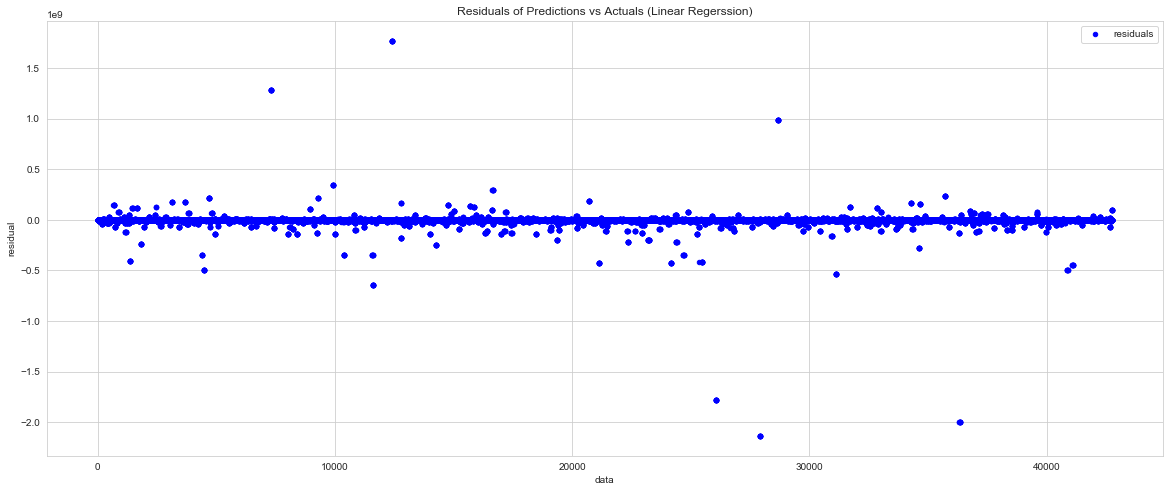

In [27]:
plot_resid(y15, yhat15)

<h1>Slice Data by Plan Size</h1>

In [45]:
X

,eir,fndng_tgt_2014,tgt_nrml_cost_2014,pmts_to_part_2014,eir_ft,eir_tnc,eir_pmt
0,6.44,102759385.0,549981.0,5135751.0,6.617704e+06,35418.7764,330742.3644
1,6.44,102759385.0,549981.0,5135751.0,6.617704e+06,35418.7764,330742.3644
2,6.44,102759385.0,549981.0,5135751.0,6.617704e+06,35418.7764,330742.3644
3,6.44,102759385.0,549981.0,5135751.0,6.617704e+06,35418.7764,330742.3644
4,6.44,102759385.0,549981.0,5135751.0,6.617704e+06,35418.7764,330742.3644
5,6.44,102759385.0,549981.0,5135751.0,6.617704e+06,35418.7764,330742.3644
6,6.44,102759385.0,549981.0,5135751.0,6.617704e+06,35418.7764,330742.3644
7,6.44,102759385.0,549981.0,5135751.0,6.617704e+06,35418.7764,330742.3644
8,6.44,102759385.0,549981.0,5135751.0,6.617704e+06,35418.7764,330742.3644
9,6.52,4466835.0,0.0,245624.0,2.912376e+05,0.0000,16014.6848


In [34]:
year=2014
X_small = X[X['fndng_tgt_{}'.format(year)] < X['fndng_tgt_{}'.format(year)].quantile(.5)]
X_big = X[X['fndng_tgt_{}'.format(year)] >= X['fndng_tgt_{}'.format(year)].quantile(.5)]
y_small = y[X['fndng_tgt_{}'.format(year)] < X['fndng_tgt_{}'.format(year)].quantile(.5)]
y_big = y[X['fndng_tgt_{}'.format(year)] >= X['fndng_tgt_{}'.format(year)].quantile(.5)]

In [33]:
len(X), len(X_small), len(X_big)

(44492, 22240, 22252)

<h1>Train Model on X_small (bottom half of 2014 data by 2014 plan size) & X_large</h1>

In [35]:
summary_model(X_small, y_small)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         fndng_tgt_2015   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     2775.
Date:                Tue, 27 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:43:37   Log-Likelihood:            -3.8966e+05
No. Observations:               22240   AIC:                         7.793e+05
Df Residuals:                   22232   BIC:                         7.794e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.327e+07   4.75e+06      2.796      0.005    3.97e+06    2.26e+07
eir                -2.078e+06   7.33e+05     -2.837      0.005   -3.51e+06   -6.42e+05
fndng_tgt_2014        -0.7033      0.412     -1.705      0.088      -1.512       0.105
tgt_nrml_cost_2014    -6.9091      1.310     -5.272      0.000      -9.478      -4.340
pmts_to_part_2014      7.2230      2.719      2.656      0.008       1.894      12.553
eir_ft                27.4483      6.360      4.316      0.000      14.983      39.914
eir_tnc              151.6191     21.050      7.203      0.000     110.359     192.879
eir_pmt             -127.9676     42.074     -3.041      0.002    -210.436     -45.499
==============================================================================
Omnibus:                    68518.517   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5002877209.138
Skew:                          47.531   Prob(JB):                         0.00
Kurtosis:                    2324.584   Cond. No.                     1.14e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
summary_model(X_big, y_big)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         fndng_tgt_2015   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.390e+05
Date:                Tue, 27 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:43:59   Log-Likelihood:            -4.6170e+05
No. Observations:               22252   AIC:                         9.234e+05
Df Residuals:                   22244   BIC:                         9.235e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.119e+07   6.11e+07     -1.165      0.244   -1.91e+08    4.85e+07
eir                 1.182e+07   9.44e+06      1.253      0.210   -6.68e+06    3.03e+07
fndng_tgt_2014         1.3098      0.112     11.657      0.000       1.090       1.530
tgt_nrml_cost_2014    -1.3634      1.648     -0.827      0.408      -4.593       1.866
pmts_to_part_2014     -2.0023      0.893     -2.241      0.025      -3.753      -0.251
eir_ft                -3.9014      1.732     -2.252      0.024      -7.297      -0.506
eir_tnc               50.0346     25.448      1.966      0.049       0.156      99.914
eir_pmt               18.7219     13.796      1.357      0.175      -8.319      45.763
==============================================================================
Omnibus:                    61840.521   Durbin-Watson:                   0.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2113801044.222
Skew:                          35.980   Prob(JB):                         0.00
Kurtosis:                    1511.202   Cond. No.                     6.23e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h1>Cluster to find groups for partitioning data</h1>

In [48]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [50]:
X_arr = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_arr_scaled = min_max_scaler.fit_transform(X_arr)
X_scaled = pd.DataFrame(X_arr_scaled)

In [38]:
kmeans = KMeans(n_clusters=3, random_state=12, n_jobs=-1)

In [ ]:
kmeans.fit_transform(X_scaled)